In [1]:
import pandas as pd
pd.set_option('max_columns', None)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/raw/Chapter_3_Diabetes_data.csv", low_memory=False)
data.shape

(101768, 50)

In [110]:
data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [3]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


#### Some numbers in data are actually categories, let's convert them

In [100]:
categorical = [
    "encounter_id",
    "patient_nbr",
    "admission_type_id",
    "discharge_disposition_id",
    "admission_source_id"
]
for variable in categorical:
    data[variable] = pd.Categorical(data[variable])

In [106]:
data.describe(include=["category"])

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id
count,101766,101766,101766,101766,101766
unique,101766,71518,8,26,17
top,443867222,88785891,1,1,7
freq,1,40,53990,60234,57494


In [51]:
data.shape[0], data["encounter_id"].nunique(), data["patient_nbr"].nunique()

(101768, 101766, 71518)

#### Looks like there are 2 potential duplicated rows, let's remove them

In [53]:
data.drop_duplicates(inplace=True)

#### Seems like patients are repeating in a dataset. Let's see how data looks for repeating patients

In [132]:
rows_per_patient = data.groupby('patient_nbr')["encounter_id"].count()

In [90]:
data = data.merge(rows_per_patient, on='patient_nbr', suffixes=("", "_count"))

In [128]:
data[data["encounter_id_count"] > 1].head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,counts,encounter_id_count
12,40926,85504905,Caucasian,Female,[40-50),NaN,1,3,7,7,NaN,Family/GeneralPractice,60,0,15,0,1,0,428,250.43,250.6,8,None,None,Steady,Up,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,<30,1.0,2
13,76387002,85504905,Caucasian,Female,[40-50),NaN,1,6,7,9,NaN,InfectiousDiseases,46,1,14,0,0,0,730,250.81,707,9,None,Norm,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,2.0,2
28,248916,115196778,Caucasian,Female,[50-60),NaN,1,1,1,2,NaN,Surgery-General,25,2,11,0,0,0,996,585,250.01,3,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,1.0,5
29,6068238,115196778,Caucasian,Female,[50-60),NaN,1,3,7,5,NaN,Family/GeneralPractice,44,1,16,0,0,3,427,585,250.41,8,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30,2.0,5
30,33695262,115196778,Caucasian,Female,[60-70),NaN,1,1,7,7,NaN,Surgery-General,45,4,21,0,0,15,996,38,403,8,None,>7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,<30,3.0,5
31,45573132,115196778,Caucasian,Female,[60-70),NaN,1,1,7,2,NaN,Surgery-General,31,2,13,0,0,14,996,403,413,7,None,None,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30,4.0,5
32,77757156,115196778,Caucasian,Female,[60-70),NaN,1,1,7,7,NaN,Pulmonology,47,1,20,0,0,2,493,403,786,6,None,None,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30,5.0,5
33,250872,41606064,Caucasian,Male,[20-30),NaN,2,1,2,10,NaN,NaN,53,0,20,0,0,0,277,250.02,263,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30,1.0,3
34,2309376,41606064,Caucasian,Male,[20-30),NaN,2,1,2,2,NaN,NaN,35,0,12,0,0,1,277,250.02,753,3,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,2.0,3
35,11198010,41606064,Caucasian,Male,[20-30),NaN,2,1,2,9,NaN,NaN,36,0,18,1,0,3,277,250.02,753,6,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30,3.0,3


In [127]:
data[data["encounter_id_count"] > 1][["patient_nbr", "change", "diabetesMed", "readmitted"]]

,patient_nbr,change,diabetesMed,readmitted
12,85504905,Ch,Yes,<30
13,85504905,No,Yes,>30
28,115196778,No,Yes,>30
29,115196778,Ch,Yes,>30
30,115196778,No,Yes,<30
31,115196778,Ch,Yes,>30
32,115196778,Ch,Yes,>30
33,41606064,Ch,Yes,>30
34,41606064,No,Yes,>30
35,41606064,No,Yes,>30


In [116]:
def plot_bar(column: str) -> None:
    data[column].value_counts().plot.bar(title=column)

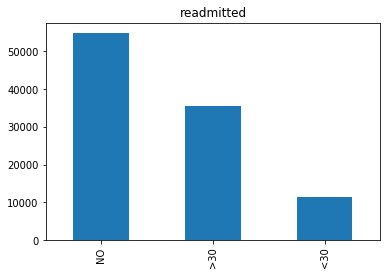

In [121]:
plot_bar("readmitted")